In [18]:
import geopandas as gpd
import rasterio
from rasterize import rasterize_shapes_to_array
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import yaml

In [19]:
yaml_file = 'events/papau_new_guinea.yml' #'porto_algre.yml'
with open(yaml_file) as f:
    event_dict = yaml.safe_load(f)["event"]
event_dict

{'event_name': 'papau_new_guinea',
 'bounds': [143.3, -5.3, 143.4, -5.4],
 'event_date': '2024-04-16',
 'pre_event_window_days': 60,
 'post_event_window_days': 30,
 'rtc_track_number': 9,
 'mgrs_tiles': None,
 'burst_ids': ['T009_019294_IW2'],
 'links': ['https://www.cnn.com/2024/05/28/asia/papua-new-guinea-landslide-satellite-imagery-intl/index.html']}

In [6]:
df_event = gpd.read_file('external_data/PNG_Landslide_2024/')
df_event.head()

,id,geometry
0,None,"POLYGON ((761991.507 9404525.454, 761968.851 9..."


In [7]:
df_event.to_crs(4326).total_bounds

array([143.36376211,  -5.38284491, 143.366189  ,  -5.37745081])

<Axes: >

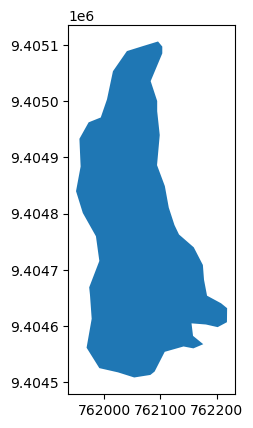

In [8]:
df_event.plot()

In [9]:
ref_path = 'out/papau_new_guinea/rtc_ts_merged/track9/__2024-02-16_merged_VH.tif'
with rasterio.open(ref_path) as ds:
    ref_profile = ds.profile
    ref_crs = ds.crs

In [10]:
df_event_utm = df_event.to_crs(ref_crs)

In [11]:
X_ext = rasterize_shapes_to_array(df_event_utm.geometry.tolist(), np.ones(df_event_utm.shape[0]), ref_profile, all_touched=True, dtype='uint8')

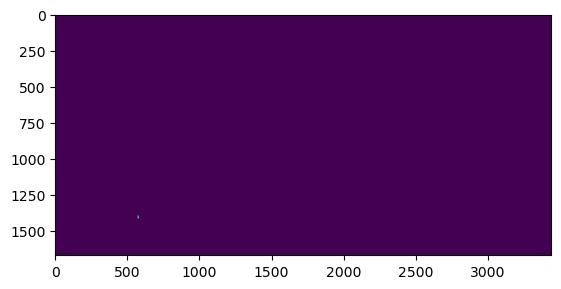

In [12]:
plt.imshow(X_ext)

In [20]:
external_data_prof = ref_profile.copy()
external_data_prof['dtype'] = 'uint8'
external_data_prof['nodata'] = 255

external_data_dir = Path(f'out/{event_dict["event_name"]}/external_data')
external_data_dir.mkdir(exist_ok=True, parents=True)

with rasterio.open(external_data_dir / 'papau_new_guinnea_landslide_map.tif', 'w', **external_data_prof) as ds:
    ds.write(X_ext, 1)